In [106]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [84]:
weather_df = pd.read_csv('1643302.csv')

#city_df = pd.read_csv('csv-zusammenfuehren.de_7gr2scwy.csv')

In [124]:
# cleaning the data of NAN values
# this removes ~96% of the data (snowfall and snow depth is not recorded hourly)
# data internally uses T to represent no snowfall, we will remove that as well

weather_df['DailySnowfall'].replace('T', np.nan, inplace=True)
weather_df.dropna(subset=['DailySnowfall'], inplace=True)

weather_df['DailySnowDepth'].replace('T', np.nan, inplace=True)
weather_df.dropna(subset=['DailySnowDepth'], inplace=True)

# converting the columns to numeric from object type

weather_df["DailySnowfall"]=pd.to_numeric(weather_df["DailySnowfall"], errors='ignore')
weather_df["DailySnowDepth"]=pd.to_numeric(weather_df["DailySnowDepth"], errors='ignore')

# slicing date to add a new column year
weather_df['YEAR']=weather_df['DATE'].str.slice(start=0, stop=4)
#weather_df['DailySnowDepth'].max()

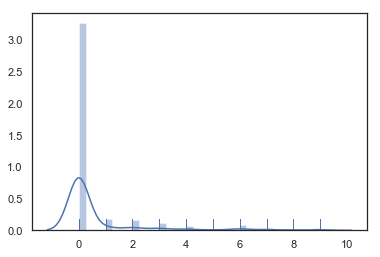

In [107]:
# lets look at the shape of the distribution of both snowfall and snow depth
val = weather_df['DailySnowDepth'].values
sns.distplot(val, rug=True, color="b")
#weather_df['DailySnowDepth'].values

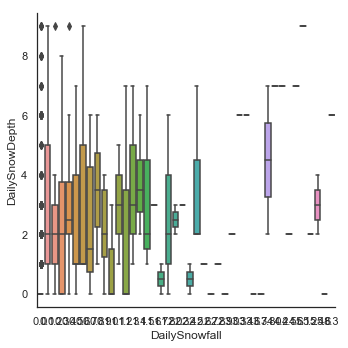

In [108]:
# 3 quartile variations of daily snowfall shown inside box
# whiskers extend to points within 1.5 inter quartiles of lower and upper bounds
# can see that there is a wide variation of snow depths that correspond to amount of daily snowfall
# there is unlikely to be much correlation

sns.catplot(x="DailySnowfall", y="DailySnowDepth", kind="box", data=weather_df)
plt;

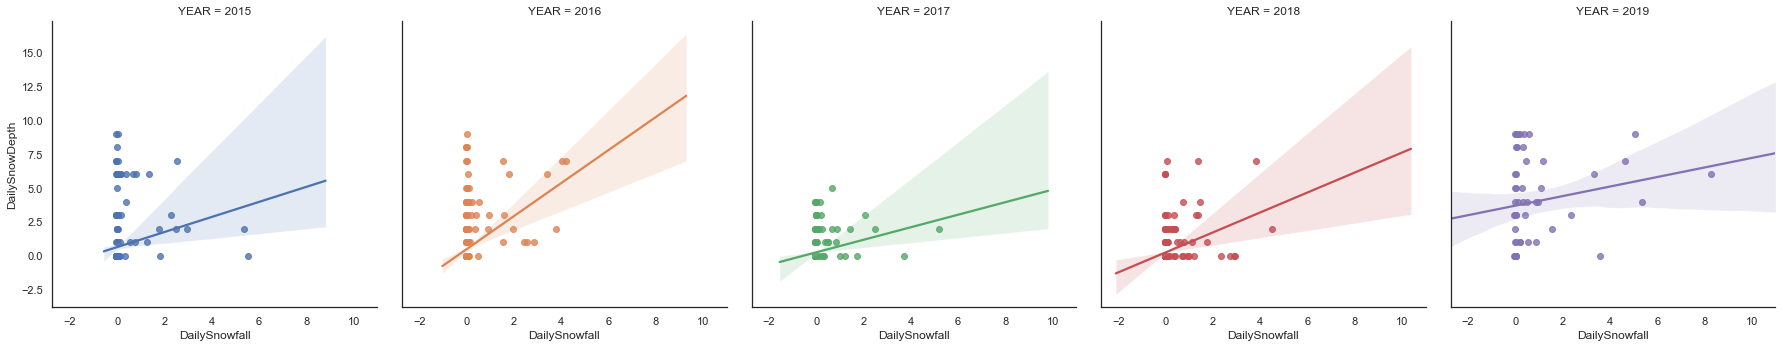

In [109]:
# just to be sure there isn't much correlation, let us look at a scatterplot of daily snowfall vs snow depth
# we can see that there is a lot of variation in this data

ax = sns.lmplot(x="DailySnowfall", y="DailySnowDepth", data=weather_df, x_jitter=0.05, hue='YEAR', ci=95, col="YEAR")
plt;

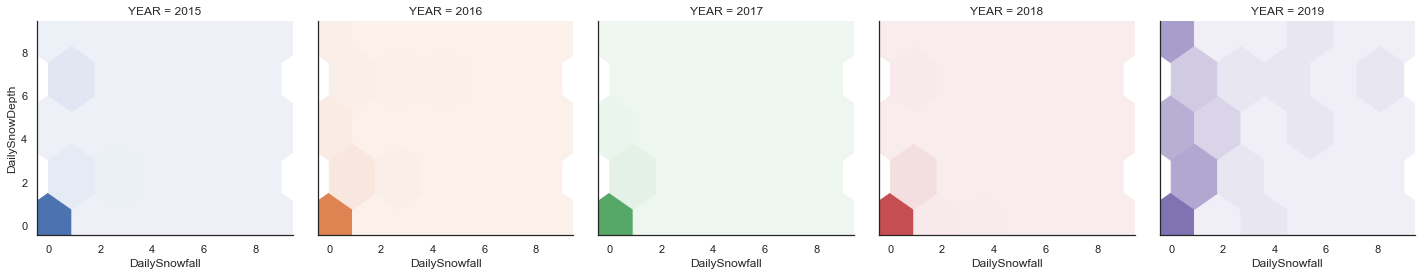

In [148]:
# thinking of different ways to visualize distribution data
# snowfall depth and daily snowfall placed in hexbins
# intensity of color corresponds to frequency
# 2019 is most random due to erratic snowfall
# seems like in 2019, snow depth accumulated due to continuous snowfall
# snowfall seemeds to be less on a single day and more dispersed in other years

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True, n_colors=100)
    plt.hexbin(x, y, gridsize=5, cmap=cmap, **kwargs)

with sns.axes_style("white"):
    g = sns.FacetGrid(weather_df, hue="YEAR", col="YEAR", height=4)
g.map(hexbin, "DailySnowfall", "DailySnowDepth", extent=[0,9, 0,9]);